In [2]:
#pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaler, y_train)
y_pred = log_reg.predict(X_test_scaler)

#### F1 score

In [13]:
f1_score(y_test, y_pred)

0.6211180124223602

#### Accuracy

In [14]:
print(accuracy_score(y_test, y_pred))

0.7359307359307359


#### Confusion matrix

In [15]:

print(confusion_matrix(y_test, y_pred))

[[120  31]
 [ 30  50]]


#### Precision score

In [16]:
precision_score(y_test, y_pred)

0.6172839506172839

#### Recall score

In [17]:
recall_score(y_test, y_pred)

0.625

#### roc curve

In [18]:
roc_curve(y_test, y_pred)

(array([0.        , 0.20529801, 1.        ]),
 array([0.   , 0.625, 1.   ]),
 array([inf,  1.,  0.]))

#### AUC Score


In [19]:
roc_auc_score(y_test, y_pred)

0.7098509933774835

## Decision Tree

In [20]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42, criterion="entropy")
clf.fit(X_train_scaler, y_train)
y_clf_pred = clf.predict(X_test_scaler)

#### F1 score

In [21]:
f1_score(y_test, y_clf_pred)

0.6557377049180327

#### Accuracy

In [22]:
accuracy_score(y_test, y_clf_pred)

0.7272727272727273

#### Confusion matrix

In [23]:
confusion_matrix(y_test, y_clf_pred)

array([[108,  43],
       [ 20,  60]])

#### Precision score

In [24]:
precision_score(y_test, y_clf_pred)

0.5825242718446602

#### Recall score

In [25]:
recall_score(y_test, y_clf_pred)

0.75

#### ROC curve

In [26]:
roc_curve(y_test, y_clf_pred)

(array([0.        , 0.28476821, 1.        ]),
 array([0.  , 0.75, 1.  ]),
 array([inf,  1.,  0.]))

#### AUC score

In [27]:
roc_auc_score(y_test, y_clf_pred)

0.732615894039735

### Plot Tree

[Text(0.56, 0.9, 'x[1] <= 1.042\nentropy = 0.934\nsamples = 537\nvalue = [349, 188]'),
 Text(0.32, 0.7, 'x[5] <= -0.739\nentropy = 0.823\nsamples = 454\nvalue = [337, 117]'),
 Text(0.44000000000000006, 0.8, 'True  '),
 Text(0.16, 0.5, 'x[1] <= 0.113\nentropy = 0.219\nsamples = 114\nvalue = [110, 4]'),
 Text(0.08, 0.3, 'x[6] <= 0.602\nentropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.04, 0.1, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(0.12, 0.1, 'entropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(0.24, 0.3, 'x[2] <= -0.674\nentropy = 0.61\nsamples = 20\nvalue = [17, 3]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.28, 0.1, 'entropy = 0.485\nsamples = 19\nvalue = [17, 2]'),
 Text(0.48, 0.5, 'x[7] <= -0.392\nentropy = 0.917\nsamples = 340\nvalue = [227, 113]'),
 Text(0.4, 0.3, 'x[1] <= 0.206\nentropy = 0.662\nsamples = 163\nvalue = [135, 28]'),
 Text(0.36, 0.1, 'entropy = 0.43\nsamples = 125\nvalue = [114, 11]'),
 Text(0.44, 0.1, 'entro

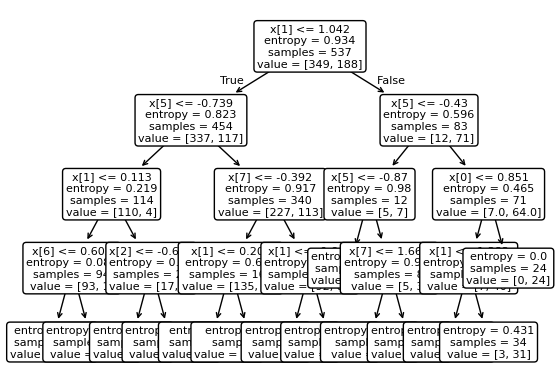

In [28]:
plot_tree(clf, rounded=True, fontsize=8, max_depth=4)

#ROC Curve

#### Decision Tree

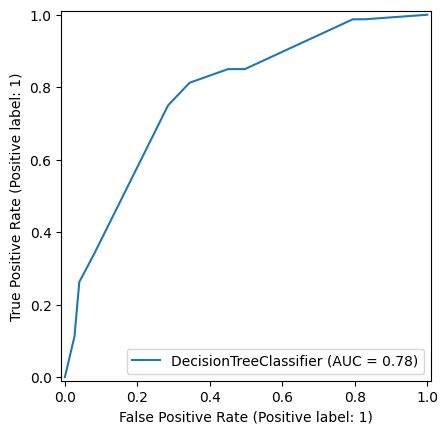

In [29]:
clf_disp = RocCurveDisplay.from_estimator(clf, X_test_scaler, y_test)
plt.show()

#### Logistic Regression

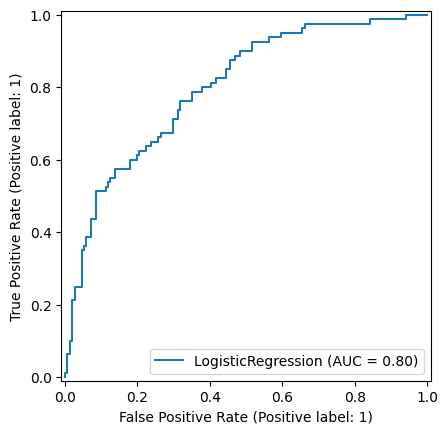

In [30]:
clf_disp = RocCurveDisplay.from_estimator(log_reg, X_test_scaler, y_test)
plt.show()

### Table Comparison

In [31]:
table = pd.DataFrame()
table["Model"] = ["Logistic Regression", "Decision Tree"]
table["Accuracy"] = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_clf_pred)]
table["Precision"] = [precision_score(y_test, y_pred), precision_score(y_test, y_clf_pred)]
table["Recall"] = [recall_score(y_test, y_pred), recall_score(y_test, y_clf_pred)]
table["F1 Score"] = [f1_score(y_test, y_pred), f1_score(y_test, y_clf_pred)]

In [32]:
table

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.735931,0.617284,0.625,0.621118
1,Decision Tree,0.727273,0.582524,0.750,0.655738


As we can the table for logistic regression and Decision tree. In the table, decision tree has better F1 score compare to the logistic regression. It also has better recall. So we are going select decision tree as its related to medical field where senstivity is more important.